In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"./titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
le_sex = LabelEncoder()

In [6]:
df['Sex'] = le_sex.fit_transform(df['Sex'])


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop(['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' , 'Embarked' , 'Cabin'], axis = "columns" , inplace= True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [10]:
df.dropna(inplace= True)

In [11]:
target = df['Survived']
df.drop(['Survived'] , axis="columns")

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
885,3,0,39.0,29.1250
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
889,1,1,26.0,30.0000


In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [13]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Splitting the data into training and testing.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df , target)

Model Training

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
model.score(x_test , y_test)

1.0

In [19]:
y_pred = model.predict(x_test)

Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix , ConfusionMatrixDisplay


In [21]:
accuracy_score(y_test , y_pred)

1.0

In [22]:
precision_score(y_test , y_pred)

1.0

In [23]:
recall_score(y_test , y_pred)

1.0

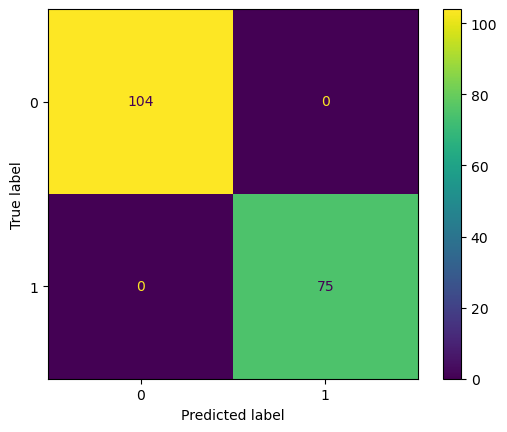

In [25]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot()
plt.show()